In [1]:
!pip install tqdm skillsnetwork

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.6 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [2]:
!pip3 install  --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 86.2 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompat

In [3]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2DTranspose,BatchNormalization,ReLU,Conv2D,LeakyReLU
import time

import keras

from IPython import display
import skillsnetwork
print(f"skillsnetwork version: {skillsnetwork.__version__}")

import matplotlib.pyplot as plt
%matplotlib inline

import os
from os import listdir
from pathlib import Path
import imghdr

from tqdm import tqdm

tensorflow version: 2.18.0
skillsnetwork version: 0.21.9


In [4]:
# This function will allow us to easily plot data taking in x values, y values, and a title
def plot_distribution(real_data,generated_data,discriminator=None,density=True):

    plt.hist(real_data.numpy(), 100, density=density, facecolor='g', alpha=0.75, label='real data')
    plt.hist(generated_data.numpy(), 100, density=density, facecolor='r', alpha=0.75,label='generated data q(z) ')

    if discriminator:
        max_=np.max([int(real_data.numpy().max()),int(generated_data.numpy().max())])
        min_=np.min([int(real_data.numpy().min()),int(generated_data.numpy().min())])
        x=np.linspace(min_, max_, 1000).reshape(-1,1)
        plt.plot(x,tf.math.sigmoid(discriminator(x,training=False).numpy()),label='discriminator',color='k')
        plt.plot(x,0.5*np.ones(x.shape),label='0.5',color='b')
        plt.xlabel('x')

    plt.legend()
    plt.show()

def plot_array(X,title=""):

    plt.rcParams['figure.figsize'] = (20,20)

    for i,x in enumerate(X[0:5]):
        x=x.numpy()
        max_=x.max()
        min_=x.min()
        xnew=np.uint(255*(x-min_)/(max_-min_))
        plt.subplot(1,5,i+1)
        plt.imshow(xnew)
        plt.axis("off")

    plt.show()

In [5]:
mean = [10]
cov = [[1]]
X = tf.random.normal((5000,1),mean=10,stddev=1.0)

print("mean:",np.mean(X))
print("standard deviation:",np.std(X))

mean: 9.990697
standard deviation: 0.99701595


In [6]:
Z = tf.random.normal((5000,1),mean=0,stddev=2)

In [7]:
print("mean:",np.mean(Z))
print("standard deviation:",np.std(Z))

mean: -0.015394455
standard deviation: 2.019471


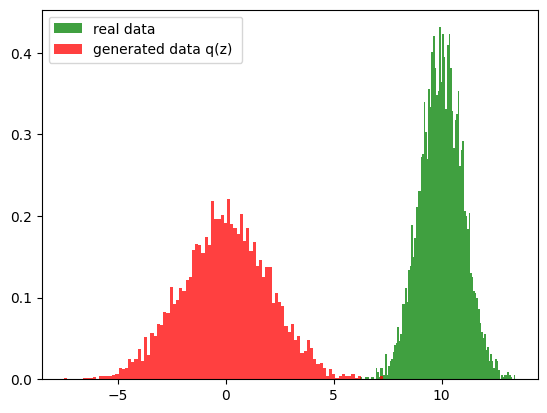

In [8]:
plot_distribution(X,Z,discriminator=None,density=True)

In [10]:
Xhat=Z+10

In [11]:
print("mean:",np.mean(Xhat))
print("standard deviation:",np.std(Xhat))

mean: 9.984606
standard deviation: 2.019471


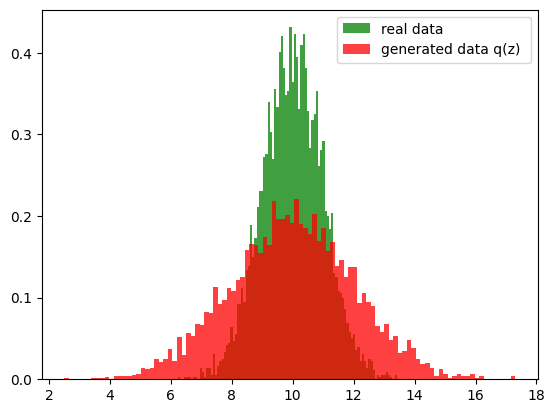

In [12]:
plot_distribution(X,Xhat,discriminator=None,density=True)

In [ ]:
from google.colab import files
files.upload()  # Unggah file kaggle.json

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d splcher/animefacedataset
!unzip animefacedataset.zip -d /content/animefacedataset

In [1]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
img_height, img_width, batch_size=64,64,128

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(directory='animefacedataset/images',
                                                       image_size=(img_height, img_width),
                                                       batch_size=batch_size,
                                                       label_mode=None)

In [ ]:
normalization_layer = layers.Rescaling(scale= 1./127.5, offset=-1)
normalized_ds = train_ds.map(lambda x: normalization_layer(x))

In [ ]:
images=train_ds.take(1)

In [ ]:
X=[x for x in images]

In [ ]:
plot_array(X[0])

In [ ]:
from tensorflow.keras import Model

def make_generator():
    # Create input layer explicitly
    inputs = Input(shape=(1, 1, 100), name='input_layer')

    # Block 1: input is latent vector -> 4x4x512
    x = Conv2DTranspose(64 * 8, kernel_size=4, strides=4, padding='same',
                       kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02),
                       use_bias=False, name='conv_transpose_1')(inputs)
    x = BatchNormalization(momentum=0.1, epsilon=0.8, center=1.0, scale=0.02, name='bn_1')(x)
    x = ReLU(name='relu_1')(x)

    # Block 2: 4x4x512 -> 8x8x256
    x = Conv2DTranspose(64 * 4, kernel_size=4, strides=2, padding='same',
                       kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02),
                       use_bias=False, name='conv_transpose_2')(x)
    x = BatchNormalization(momentum=0.1, epsilon=0.8, center=1.0, scale=0.02, name='bn_2')(x)
    x = ReLU(name='relu_2')(x)

    # Block 3: 8x8x256 -> 16x16x128
    x = Conv2DTranspose(64 * 2, kernel_size=4, strides=2, padding='same',
                       kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02),
                       use_bias=False, name='conv_transpose_3')(x)
    x = BatchNormalization(momentum=0.1, epsilon=0.8, center=1.0, scale=0.02, name='bn_3')(x)
    x = ReLU(name='relu_3')(x)

    # Block 4: 16x16x128 -> 32x32x64
    x = Conv2DTranspose(64 * 1, kernel_size=4, strides=2, padding='same',
                       kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02),
                       use_bias=False, name='conv_transpose_4')(x)
    x = BatchNormalization(momentum=0.1, epsilon=0.8, center=1.0, scale=0.02, name='bn_4')(x)
    x = ReLU(name='relu_4')(x)

    # Final Block: 32x32x64 -> 64x64x3
    outputs = Conv2DTranspose(3, kernel_size=4, strides=2, padding='same',
                            kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02),
                            use_bias=False, activation='tanh',
                            name='conv_transpose_5')(x)

    # Create model using functional API
    model = Model(inputs=inputs, outputs=outputs, name='generator')

    return model

In [ ]:
gen = make_generator()
gen.summary()

In [ ]:
def make_discriminator():

    model=Sequential()

    # Block 1: input is 64 x 64 x (3)
    model.add(Input(shape=(64, 64, 3), name='input_layer'))
    model.add(Conv2D(64, kernel_size=4, strides= 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_1'))
    model.add(LeakyReLU(0.2, name='leaky_relu_1'))

    # Block 2: input is 32 x 32 x (64)
    model.add(Conv2D(64 * 2, kernel_size=4, strides= 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_2'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_1'))
    model.add(LeakyReLU(0.2, name='leaky_relu_2'))

    # Block 3
    model.add(Conv2D(64 * 4, 4, 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_3'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_2'))
    model.add(LeakyReLU(0.2, name='leaky_relu_3'))


    #Block 4
    model.add(Conv2D(64 * 8, 4, 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_4'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_3'))
    model.add(LeakyReLU(0.2, name='leaky_relu_4'))


    #Block 5
    model.add(Conv2D(1, 4, 2,padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False,
                     activation='sigmoid', name='conv_5'))

    return model

In [ ]:
disc = make_discriminator()
disc.summary()

Defining Loss Functions

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def generator_loss(Xhat):
    return cross_entropy(tf.ones_like(Xhat), Xhat)

In [ ]:
def discriminator_loss(X, Xhat):
    real_loss = cross_entropy(tf.ones_like(X), X)
    fake_loss = cross_entropy(tf.zeros_like(Xhat), Xhat)
    total_loss = 0.5*(real_loss + fake_loss)
    return total_loss

Defining Optimizers

In [ ]:
learning_rate = 0.0002

generator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0002, beta_1 = 0.5, beta_2 = 0.999 )

discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0002, beta_1 = 0.5, beta_2 = 0.999 )

Create Train Step Function

In [ ]:
@tf.function

def train_step(X):

    #random samples it was found if you increase the  stander deviation, you get better results
    z= tf.random.normal([BATCH_SIZE, 1, 1, latent_dim])
      # needed to compute the gradients for a list of variables.
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        #generated sample
        xhat = generator(z, training=True)
        #the output of the discriminator for real data
        real_output = discriminator(X, training=True)
        #the output of the discriminator for fake data
        fake_output = discriminator(xhat, training=True)

        #loss for each
        gen_loss= generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
      # Compute the gradients for gen_loss and generator

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    # Compute the gradients for gen_loss and discriminator
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    # Ask the optimizer to apply the processed gradients
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
generator= make_generator()
BATCH_SIZE=128

latent_dim=100
noise = tf.random.normal([BATCH_SIZE, 1, 1, latent_dim])
Xhat=generator(noise,training=False)
plot_array(Xhat)

Trining DCGANs

In [ ]:
epochs=1

discriminator=make_discriminator()

generator= make_generator()


for epoch in range(epochs):

    #data for the true distribution of your real data samples training ste
    start = time.time()
    i=0
    for X in tqdm(normalized_ds, desc=f"epoch {epoch+1}", total=len(normalized_ds)):

        i+=1
        if i%1000:
            print("epoch {}, iteration {}".format(epoch+1, i))

        train_step(X)


    noise = tf.random.normal([BATCH_SIZE, 1, 1, latent_dim])
    Xhat=generator(noise,training=False)
    X=[x for x in normalized_ds]
    print("orignal images")
    plot_array(X[0])
    print("generated images")
    plot_array(Xhat)
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

In [ ]:
generator_url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/data/generator.tar"
await skillsnetwork.prepare(generator_url, overwrite=True)

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

Load the generator

In [ ]:
from tensorflow.keras.models import load_model


full_generator=load_model("generator.keras")

In [ ]:
# Create noise
latent_dim = 100
noise = tf.random.normal([200, 1, 1, latent_dim])

# Use the new generator 'gen' instead of 'full_generator'
Xhat = gen(noise, training=False)  # Use 'gen' here, not 'full_generator'
plot_array(Xhat)

Deep Convolutional Generative Adversarial Network (DCGAN) adalah salah satu arsitektur Generative Adversial Network (GAN) yang dirancang untuk menganalisis data, seperti gambar, video, atau audio, menggunakan jaringan saraf konvolusional CNN, dikarenakan stabilitas dalam pelatihan dan kemampuannya untuk menghasilkan data sintetis berkualitas tinggi.
pada kasus diatas perusahaan video game anime online ingin membuat avatar anime yang unik untk sebuah game untuk setiap pemain sehinggamenggunaka DCGAN untuk membuat setiap karakter.

Dataset yag digunakan dalam kasus ini dari kaggle berupa dataset wajah anime yang berkualias tinggi untuk membuat model-model tersebut.
Setiap lapisan Conv2DTranspose (kecuali lapisan terakhir) diikuti oleh lapisan Batch Normalization dan aktivasi Relu; untuk detail implementasi lebih lanjut.

Melatih model DCGAN untuk satu epoch dan kemudian menggunakan generator untuk menghasilkan gambar buatan. satu epoch dapat membutuhkan waktu yang cukup lama, jika ingin mengevaluasi performa GAN yaang sudah terlatih dan dioptimalkan, kita harus menambahkan jumlan epoch. Oleh karena itu, untuk membantu Anda menghindari waktu pelatihan yang sangat lama dalam lab ini, kita hanya akan mengunduh parameter jaringan Generator yang telah dilatih sebelumnya dan kemudian menggunakan fungsi Kera load_model untuk mendapatkan Generator yang telah dilatih sebelumnya, yang akan kita gunakan untuk menghasilkan gambar secara langsung.